In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/cxr_IEEE_pre/split')

['train', 'test', 'val']

In [ ]:
train_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train"


In [ ]:
print("Train set:\n========================================")
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'virus')))
num_normal = len(os.listdir(os.path.join(train_dir, 'normal')))
num_covid = len(os.listdir(os.path.join(train_dir, 'covid')))
print(f"Virus={num_pneumonia}")
print(f"NORMAL={num_normal}")
print(f"COVID={num_covid}")

Train set:
Virus=495
NORMAL=534
COVID=428


In [ ]:
test_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/test"


In [ ]:
print("Test set:\n========================================")


num_pneumonia = len(os.listdir(os.path.join(test_dir, 'virus')))
num_normal = len(os.listdir(os.path.join(test_dir, 'normal')))
num_covid = len(os.listdir(os.path.join(test_dir, 'covid')))

print(f"Virus={num_pneumonia}")
print(f"NORMAL={num_normal}")
print(f"COVID={num_covid}")

Test set:
Virus=116
NORMAL=126
COVID=100


In [ ]:
val_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/val"

In [ ]:
print("Validation set:\n========================================")
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'virus')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'normal')))}")
print(f"VIRUS={len(os.listdir(os.path.join(val_dir, 'virus')))}")


Validation set:
PNEUMONIA=8
NORMAL=8
VIRUS=8


In [ ]:
pneumonia = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/virus")
pneumonia_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/virus"


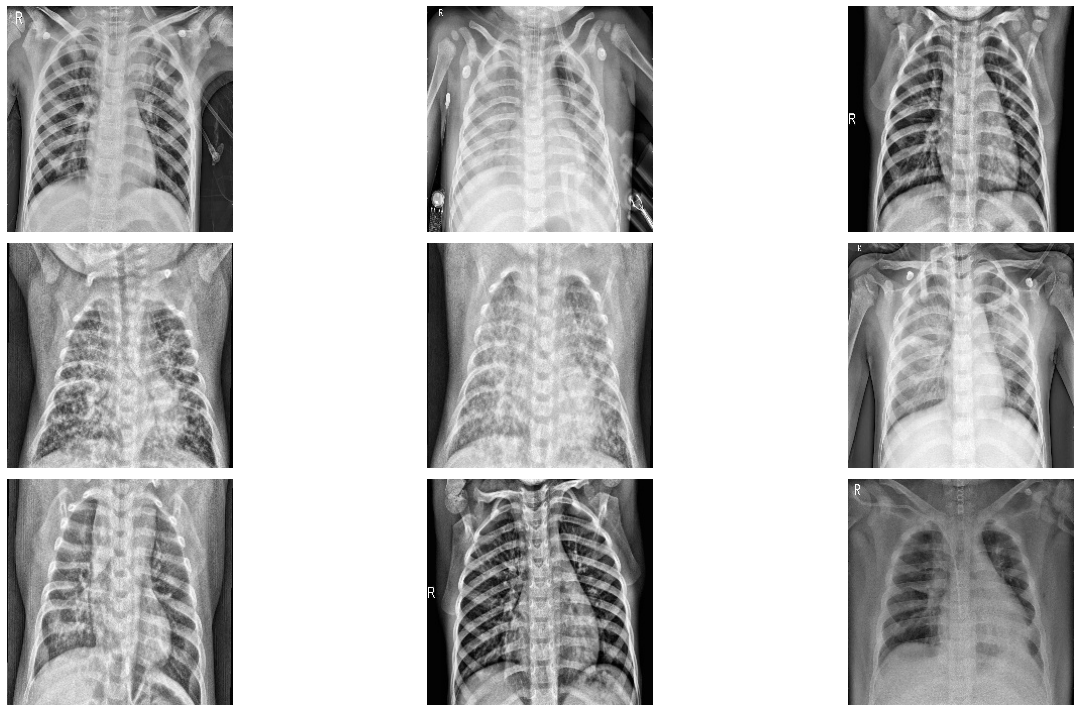

In [ ]:

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

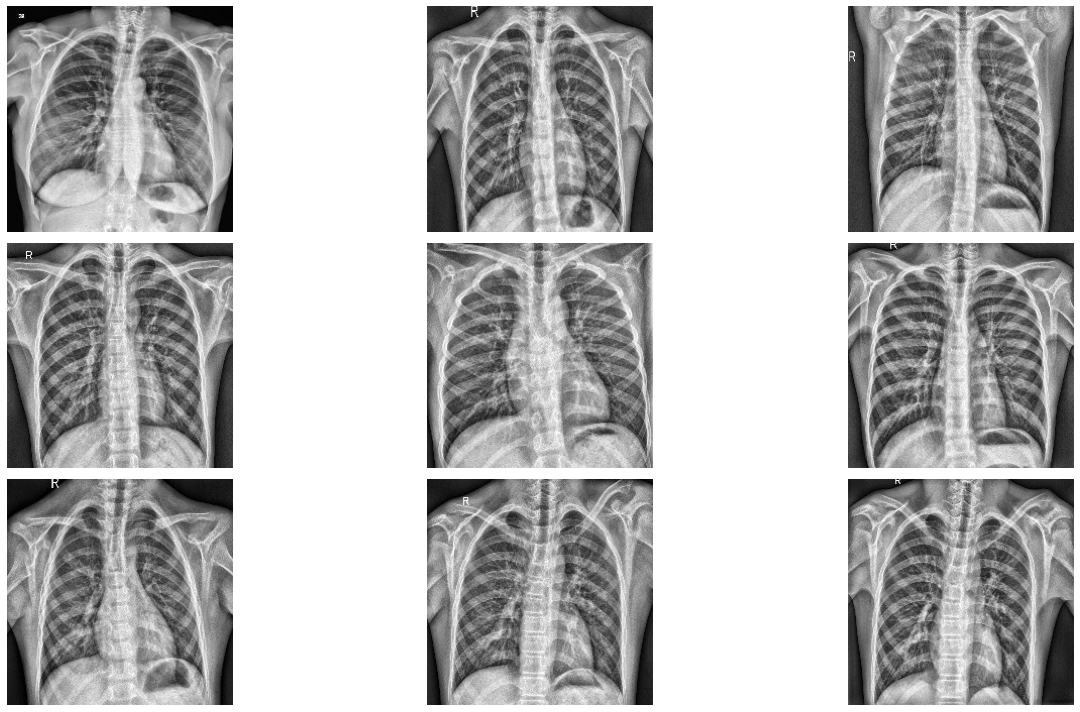

In [ ]:
normal = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal")
normal_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

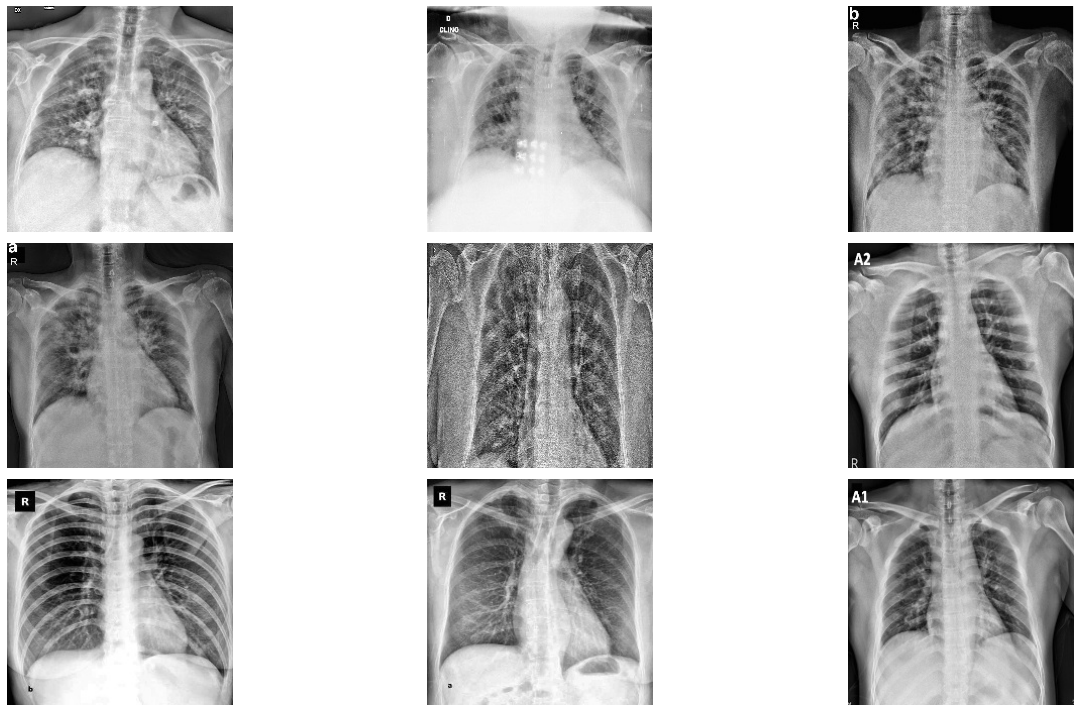

In [ ]:
covid = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid")
covid_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/covid"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(covid_dir, covid[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 224 pixels width and 224 pixels height, one single color channel.
The maximum pixel value is 255.0000 and the minimum is 0.0000
The mean value of the pixels is 138.9025 and the standard deviation is 60.2091


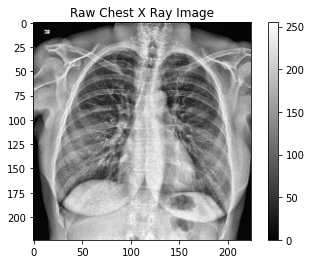

In [ ]:
normal_img = os.listdir("/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal")[0]
normal_dir = "/content/drive/MyDrive/cxr_IEEE_pre/split/train/normal"
sample_img = plt.imread(os.path.join(normal_dir, normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# Pixels in Image')

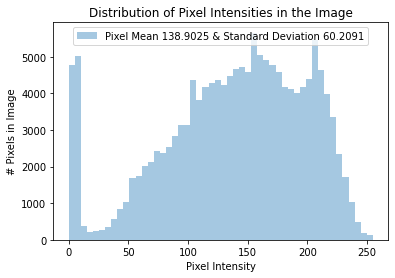

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [ ]:
#IMAGE_PRE-PROCESSING


from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    vertical_flip = True,
    horizontal_flip= True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=64, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(224, 224))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=64, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(224, 224))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=64, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(224, 224))

Found 1457 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 342 images belonging to 3 classes.


In [ ]:
# Class weights

weight_for_0 = num_pneumonia / (num_normal + num_pneumonia)
weight_for_1 = num_normal / (num_normal + num_pneumonia)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.48
Weight for class 1: 0.52


In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16


vgg16_base_model = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D   
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.layers import BatchNormalization
from keras.layers import Dropout

vgg16_model = tf.keras.Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(224, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(3,activation="softmax")
    ])

In [ ]:
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    vgg16_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = vgg16_model.fit(train,
          epochs=100,
          validation_data=validation
          )

Epoch 1/100
23/23 [==============================] - 83s 2s/step - loss: 1.3420 - accuracy: 0.4866 - val_loss: 9218.0420 - val_accuracy: 0.3333
Epoch 2/100
23/23 [==============================] - 38s 2s/step - loss: 0.8968 - accuracy: 0.6383 - val_loss: 52.0307 - val_accuracy: 0.3333
Epoch 3/100
23/23 [==============================] - 37s 2s/step - loss: 0.7267 - accuracy: 0.7056 - val_loss: 39.0906 - val_accuracy: 0.3333
Epoch 4/100
23/23 [==============================] - 37s 2s/step - loss: 0.6626 - accuracy: 0.7481 - val_loss: 13.4370 - val_accuracy: 0.3333
Epoch 5/100
23/23 [==============================] - 37s 2s/step - loss: 0.6131 - accuracy: 0.7721 - val_loss: 8.8227 - val_accuracy: 0.3333
Epoch 6/100
23/23 [==============================] - 37s 2s/step - loss: 0.5865 - accuracy: 0.7886 - val_loss: 1.0821 - val_accuracy: 0.6667
Epoch 7/100
23/23 [==============================] - 37s 2s/step - loss: 0.5707 - accuracy: 0.7900 - val_loss: 6.5558 - val_accuracy: 0.3750
Epoch 8

Text(0.5, 1.0, 'Accuracy Evolution')

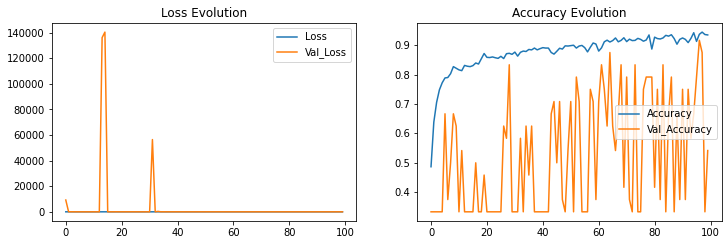

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

6/6 [==============================] - 81s 16s/step - loss: 1.1934 - accuracy: 0.6199
Test Accuracy: 61.99%
23/23 [==============================] - 25s 1s/step - loss: 1.1639 - accuracy: 0.6376
Train Accuracy: 63.76%


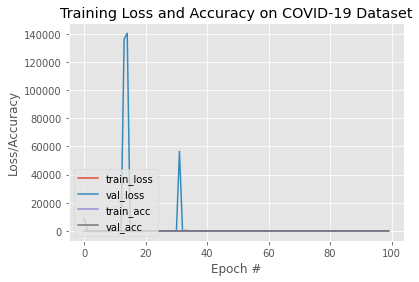

In [ ]:
# plot the training loss and accuracy
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), r.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), r.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), r.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), r.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")